# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [48]:
import pandas as pd
df = pd.read_csv('./airbnb_hw.csv')

# Clean price variable:
price = df['Price']
price = price.str.replace(',','')
price = pd.to_numeric(price,errors='coerce')
df['Price'] = price
del price

In [49]:
print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [50]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


The majority of properties are apartments, houses, lofts and condos, and the remaining are just random properties like lighthouses, cabins, boats, bungalows, etc. It is interesting to see that for most apartments, the entire property is rented out, while for houses, its often just individual rooms instead of the whole home.

<Axes: xlabel='Price', ylabel='Count'>

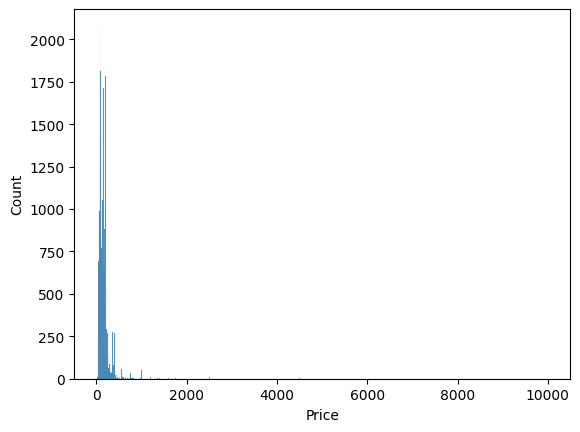

In [51]:
sns.histplot(data=df,x='Price')

<Axes: xlabel='Price', ylabel='Density'>

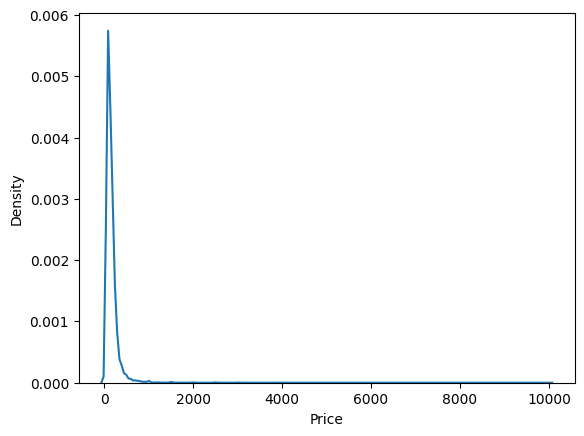

In [52]:
sns.kdeplot(data=df,x='Price')

<Axes: xlabel='Price'>

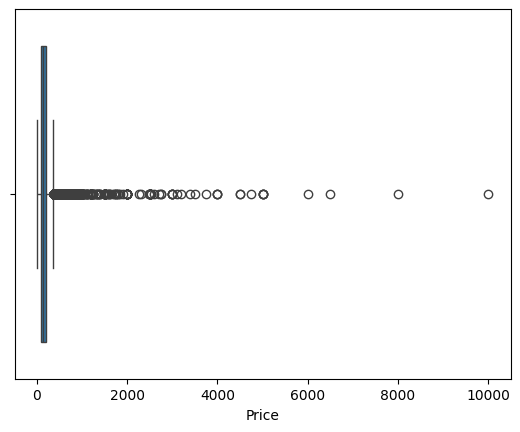

In [53]:
sns.boxplot(data=df,x='Price')

In [54]:
df['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


The data is poorly scaled, and there are outliers.

In [55]:
df['Price_log'] = np.log(df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

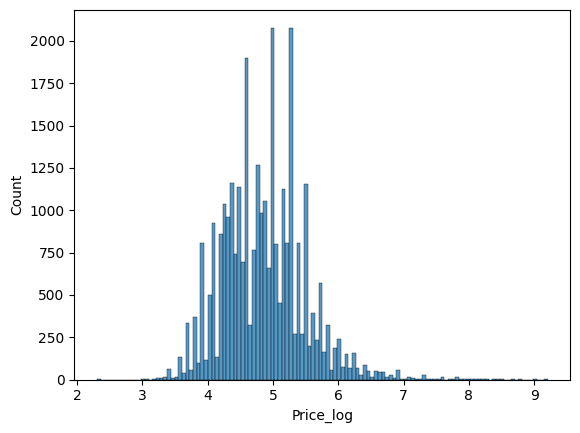

In [56]:
sns.histplot(data=df,x='Price_log')

<Axes: xlabel='Price_log', ylabel='Density'>

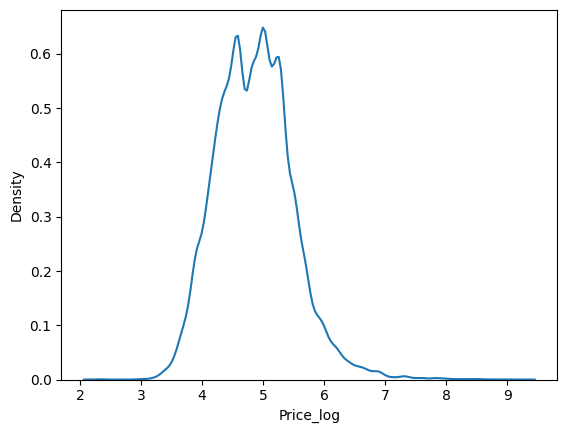

In [57]:
sns.kdeplot(data=df,x='Price_log')

<Axes: xlabel='Price_log'>

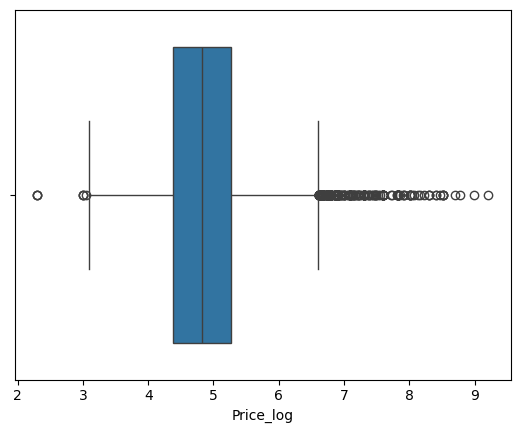

In [58]:
sns.boxplot(data=df,x='Price_log')

In [59]:
df['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


<Axes: xlabel='Beds', ylabel='Price_log'>

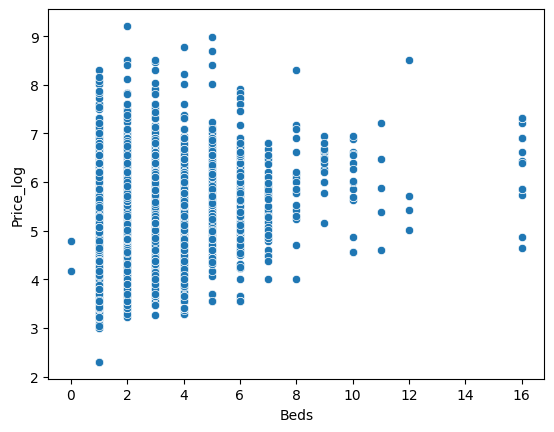

In [60]:
sns.scatterplot( data=df, x='Beds', y='Price_log')

In [61]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

It seems like as the number of beds goes up, the price tends to increase as well. The standard deviation goes up until 6, and varies a lot by the number of beds.

<Axes: xlabel='Beds', ylabel='Price_log'>

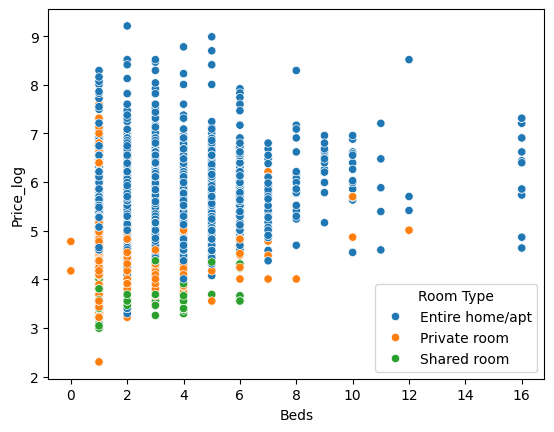

In [62]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

In [63]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

Based on the plot, the shared rooms and private rooms tend to be the cheapest properties for any given number of beds, as indicated by the fact that their points are along the bottom section of the plot.

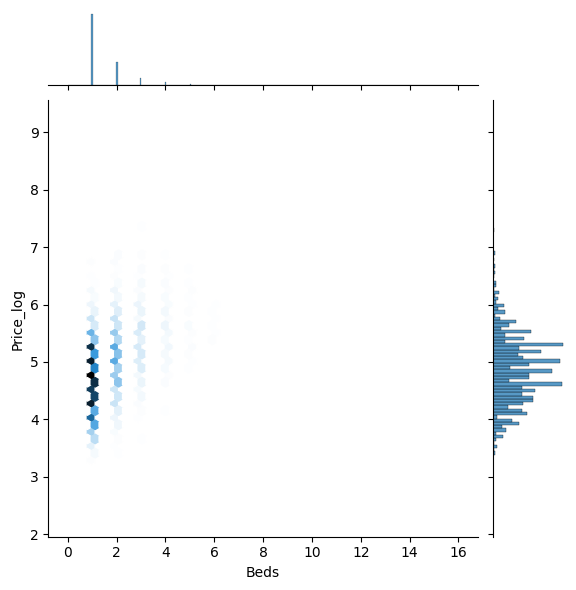

In [64]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

The mast majority of the properties for rent have 1-4 beds, the number decreasing drastically when it comes to the range of 5-16 beds in a property. Most properties are within the bounds of 2.5 to 6 log points.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
**I think that this data dictionary does a good job in defining the variables/columns, and it is very easy to follow and understand. However, it lacks in explaining how to handle missing vlaues -- for both numeric and categorical variables.**
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
**There are outliers in the dataset, as shown by the boxplots.**
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
**After creating the kernel density plots for my variables, all of them showed that there was an outlier, and so in order to rescale them, I set a threshold so that we can get a better view of the densities for my different variables.**
7. Create a scatter plot, and describe the relationship you see.
**Due to the amount of data, it is a bit difficult to see any specific patterns, however, it is interesting to note that the number of patients that are confirmed with COVID-19 and died of COVID-19 is overall lower in states indicated by the pink/redish dots, while states that are indicated by the blue hue dots are a lot higher in value.**
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.
**Overall, the findings from this variance-covariance matrix suggest strong relationships between resident and staff infections, as well as between resident infections and deaths.**





In [28]:
data = pd.read_csv('./covid19_data.csv',low_memory=False)
data.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Cleaning -- choose specific variables, drop missing values
selected_columns = ['Provider State', 'Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths','Staff Total Confirmed COVID-19']
df = data[selected_columns].copy()
df.dropna(inplace=True)
df.head()

,Provider State,Residents Total Confirmed COVID-19,Residents Total COVID-19 Deaths,Staff Total Confirmed COVID-19
0,AL,45.0,4.0,33.0
1,AL,45.0,4.0,35.0
2,AL,45.0,4.0,35.0
3,AL,45.0,4.0,35.0
4,AL,45.0,4.0,35.0


Of all the variables in the dataset, I am most interested in the four variables, as these variables give me insight on the location of our data, and while keeping the simplicity of our dataframe, we get the most important variables to provide us some insight to our problem.

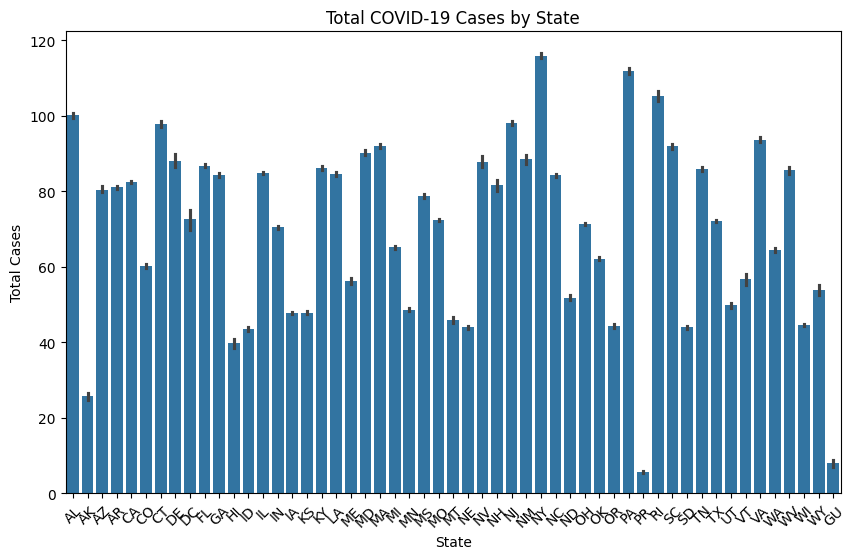

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Provider State', y='Residents Total Confirmed COVID-19', data=df)
plt.title('Total COVID-19 Cases by State')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Residents Total Confirmed COVID-19'>

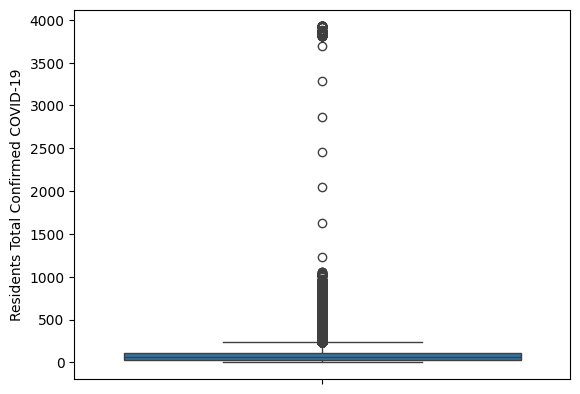

In [31]:
sns.boxplot(df['Residents Total Confirmed COVID-19'])

<Axes: ylabel='Residents Total COVID-19 Deaths'>

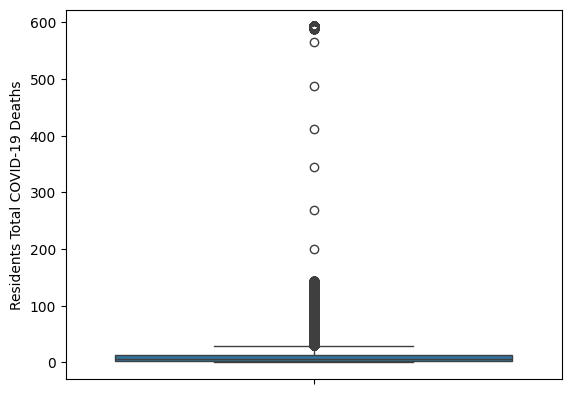

In [32]:
sns.boxplot(df['Residents Total COVID-19 Deaths'])

<Axes: ylabel='Staff Total Confirmed COVID-19'>

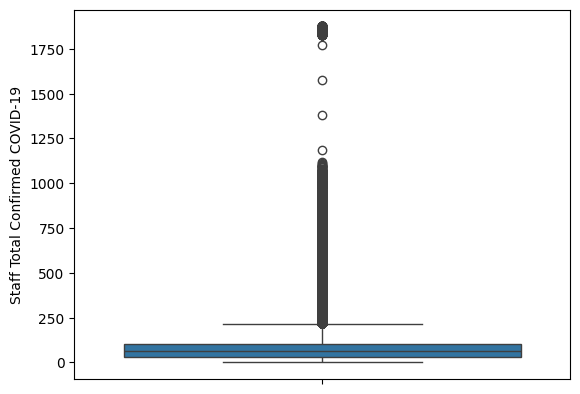

In [33]:
sns.boxplot(df['Staff Total Confirmed COVID-19'])


<Axes: xlabel='Residents Total Confirmed COVID-19', ylabel='Density'>

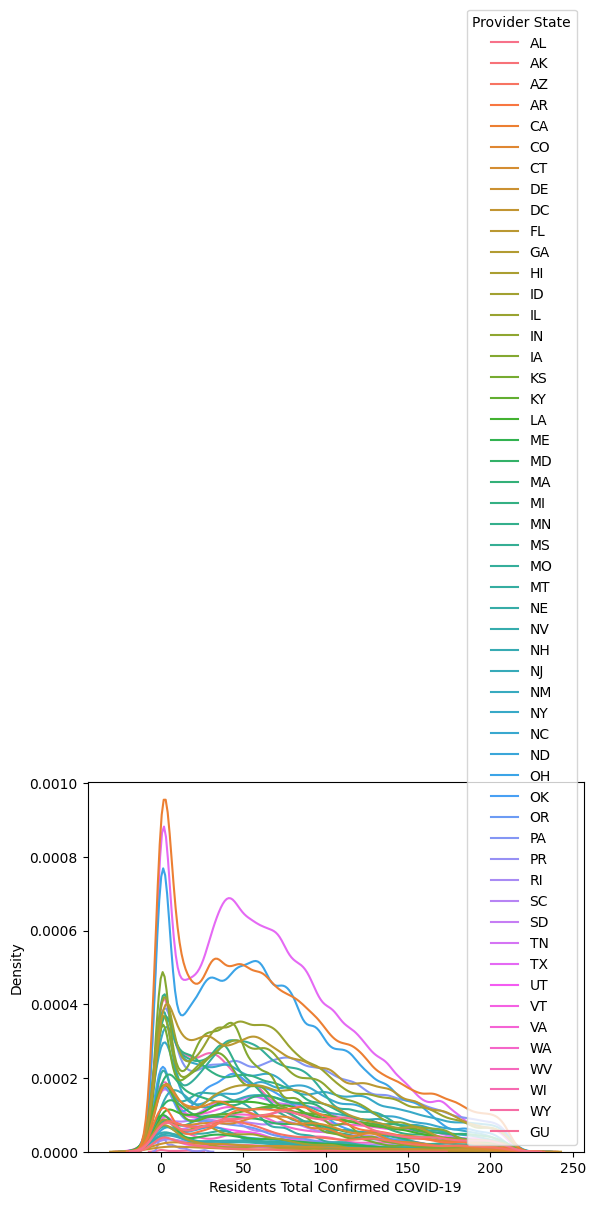

In [34]:
# Set a threshold (e.g., 95th percentile)
threshold = df['Residents Total Confirmed COVID-19'].quantile(0.95)
filtered_df = df[df['Residents Total Confirmed COVID-19'] <= threshold]
sns.kdeplot(data=filtered_df,x='Residents Total Confirmed COVID-19',hue='Provider State')

<ipython-input-35-a5fe95e6a99d>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df,x='Residents Total COVID-19 Deaths',hue='Provider State')


<Axes: xlabel='Residents Total COVID-19 Deaths', ylabel='Density'>

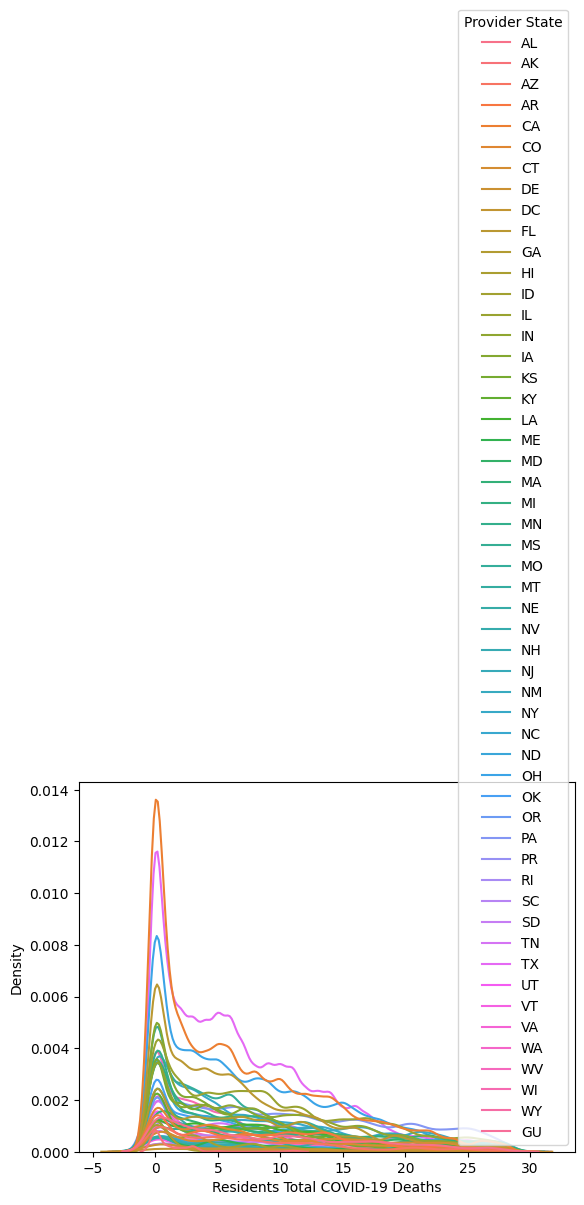

In [35]:
# Set a threshold (e.g., 95th percentile)
threshold = df['Residents Total COVID-19 Deaths'].quantile(0.95)
filtered_df = df[df['Residents Total COVID-19 Deaths'] <= threshold]
sns.kdeplot(data=filtered_df,x='Residents Total COVID-19 Deaths',hue='Provider State')

<Axes: xlabel='Staff Total Confirmed COVID-19', ylabel='Density'>

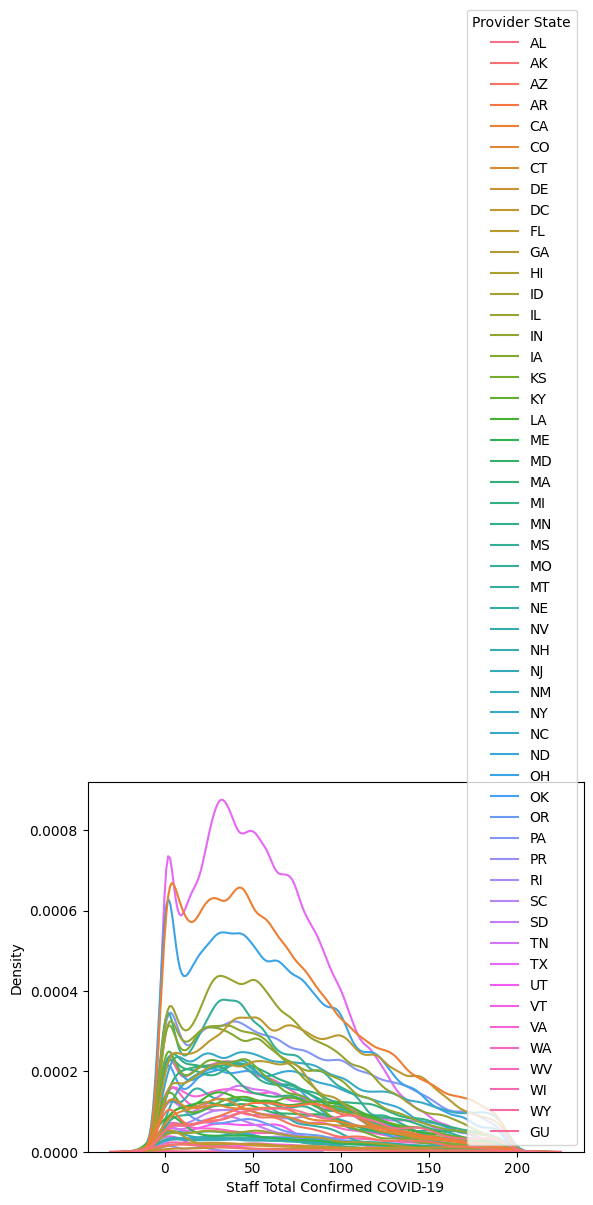

In [36]:
# Set a threshold (e.g., 95th percentile)
threshold = df['Staff Total Confirmed COVID-19'].quantile(0.95)
filtered_df = df[df['Staff Total Confirmed COVID-19'] <= threshold]
sns.kdeplot(data=filtered_df,x='Staff Total Confirmed COVID-19',hue='Provider State')


<Axes: xlabel='Residents Total Confirmed COVID-19', ylabel='Residents Total COVID-19 Deaths'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


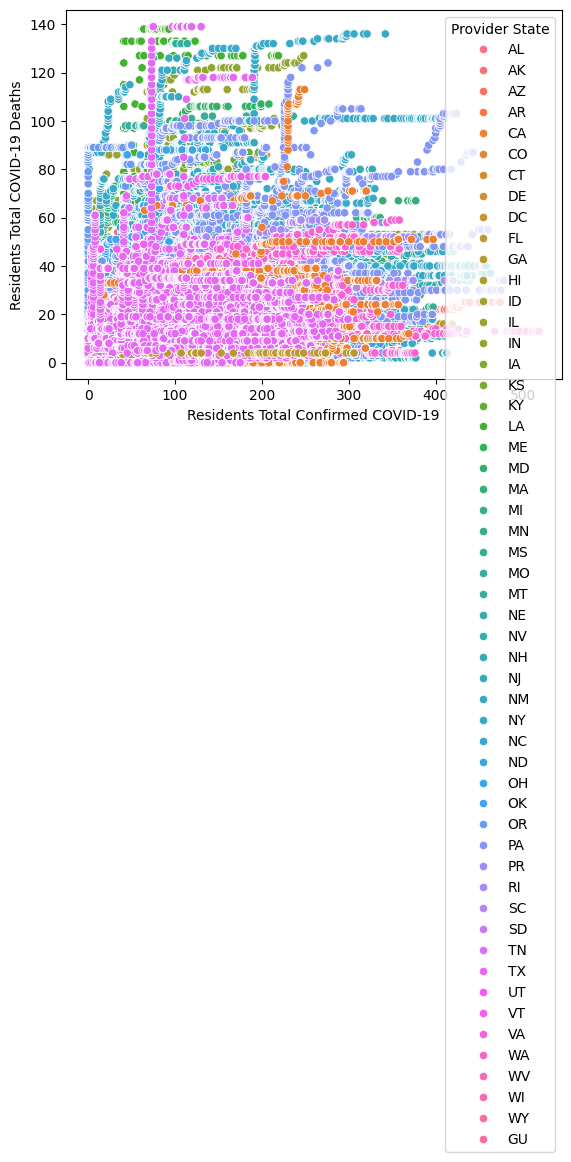

In [40]:
sns.scatterplot(data=filtered_df,x='Residents Total Confirmed COVID-19',y='Residents Total COVID-19 Deaths',hue='Provider State')

In [46]:
# Variance-Covariance matrix for numeric variables
cov_matrix = df[['Residents Total Confirmed COVID-19', 'Residents Total COVID-19 Deaths','Staff Total Confirmed COVID-19']].cov()
print(cov_matrix)

                                    Residents Total Confirmed COVID-19  \
Residents Total Confirmed COVID-19                         5986.054490   
Residents Total COVID-19 Deaths                             598.464172   
Staff Total Confirmed COVID-19                             4180.059598   

                                    Residents Total COVID-19 Deaths  \
Residents Total Confirmed COVID-19                       598.464172   
Residents Total COVID-19 Deaths                          146.102785   
Staff Total Confirmed COVID-19                           409.189985   

                                    Staff Total Confirmed COVID-19  
Residents Total Confirmed COVID-19                     4180.059598  
Residents Total COVID-19 Deaths                         409.189985  
Staff Total Confirmed COVID-19                         4642.746457  
